# Customer Segmentation 

Customer Segmentation allows marketers to understand descrete groups of customers which can be help marketers to plan strategy to maximize the value of customer to their business,consumer experience insights, product development innovation approaches, suggestions for boosting customer loyalty, and more.

We would explore the cutomer dataset to find who are target cutomers , what kind of customers visits in the mall and try to segment them accordingly...

We have the customer dataset from a mall,can be found [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).


 

In [1]:
#importing lib 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px   # for 3d plots 
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.preprocessing import StandardScaler

In [2]:
#reading data
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Data exploraion

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From above we can see that their are no null values in the dataset, and we have Gender as the object ,so we need to handle this object value later while segmenting the customers.

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


If we look at then average customer are around the age of 38 and we have the cutomers:
* having age between 18-70. 
* Having annual income between 15-137($K).
* having avg spend score of 50.

We can also look the distribution of ages to see the avg ages of customers

## Data Visulization

<AxesSubplot:xlabel='Age', ylabel='count'>

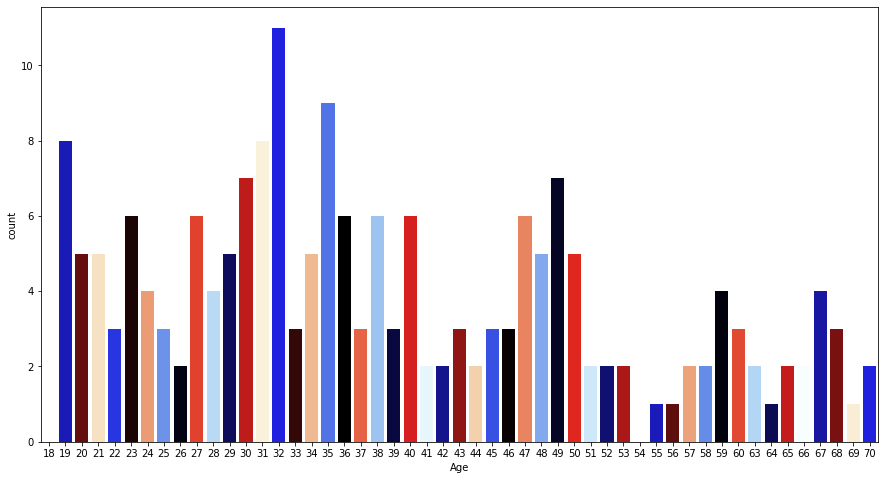

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Age',palette='flag')

Most of the customer were have age between 28-30, we can also look at the histogram for a better conclusion over the group of ages.

Let's look how many of them are male and female...

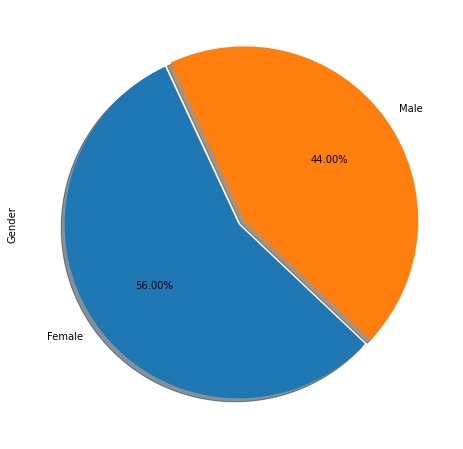

In [7]:
plt.figure(figsize=(8,8))
data['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,startangle=115,explode=(0,0.04))
plt.show()

The number of women customers are more than men , womens are 12% more as compared to mens in the dataset, means their are more women customer.

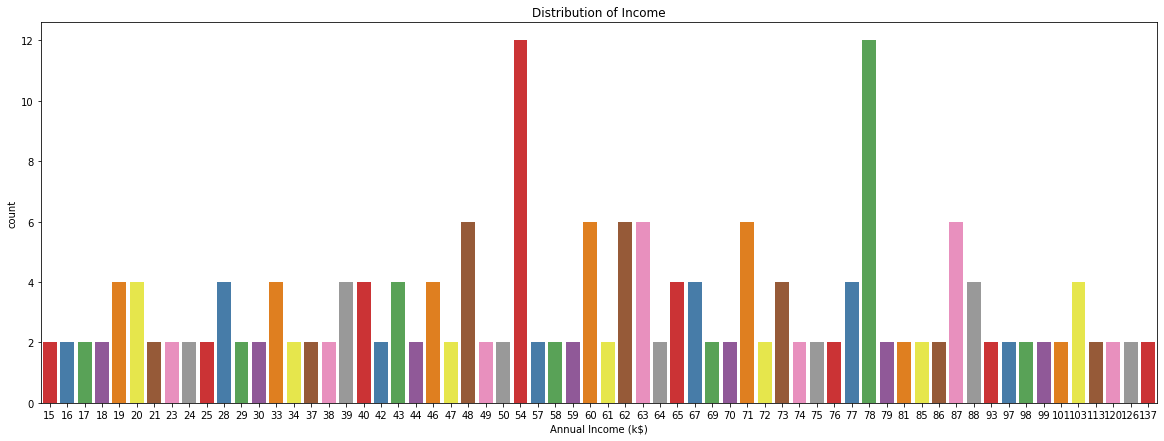

In [8]:
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income (k$)", data=data, palette='Set1')
plt.title('Distribution of Income')
plt.show()

Two income range of Customer were mostly visited that is 54($k) and 78($k), but this does not give more insight fot the distribution of prices as they are almost equally distriubuted for different income range...

We can compare their income ranges using histgrams.

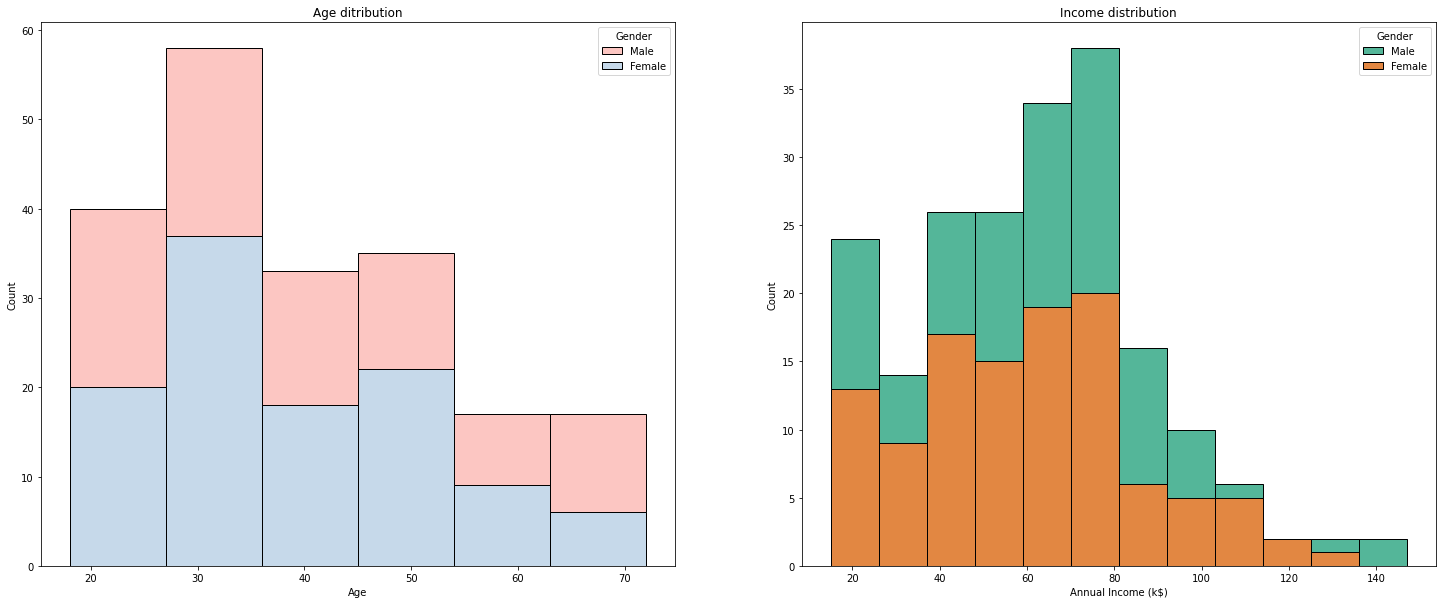

In [9]:
_,(ax0, ax1) = plt.subplots(1, 2, figsize=(25, 10))  ##plotting 2 plots
sns.histplot(data=data, x='Age', hue='Gender', binwidth=9, multiple='stack', ax=ax0,palette='Pastel1').set_title('Age ditribution') ##plot for age distribution
sns.histplot(data=data, x='Annual Income (k$)', hue='Gender', binwidth=11, multiple='stack', ax=ax1,palette='Dark2').set_title('Income distribution') #plot for income distribution
plt.show()

- 20-30 & 30-40 are the most common age group customers
- The biggest cusomer age group is 30 year-old customers and those are mostly women.
- Most of customers earn between \$50k -  \$80k .
- Very few people earns more than $120k .
- Avg Annual income of cutomers is around $60k.

Womes are dominating among men in terms of Annual income for almost every age group.

Text(0, 28, 'Annual Income Distribution')

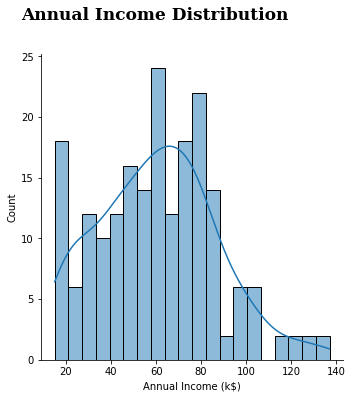

In [10]:
sns.displot(x="Annual Income (k$)", data=data, kde=True, bins=20)  ##kde plot for annual income
plt.text(0, 28, 'Annual Income Distribution', fontfamily='serif', fontsize=17, fontweight='bold')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

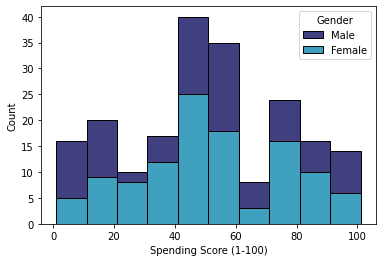

In [11]:
sns.histplot(data=data, x='Spending Score (1-100)', hue='Gender', binwidth=10, multiple='stack',palette='ocean') #ploting their spend score

Their is different trend over spending score:
- 0-20 -> men domintate
- 25 and 40 ->women domintate
- 45 and 60 ->women domintate
- 65 and 70 ->men dominates
- 70 and 100->women dominates

From above we can say overall women have more spending score as from previous plot also women dominates in annual income .

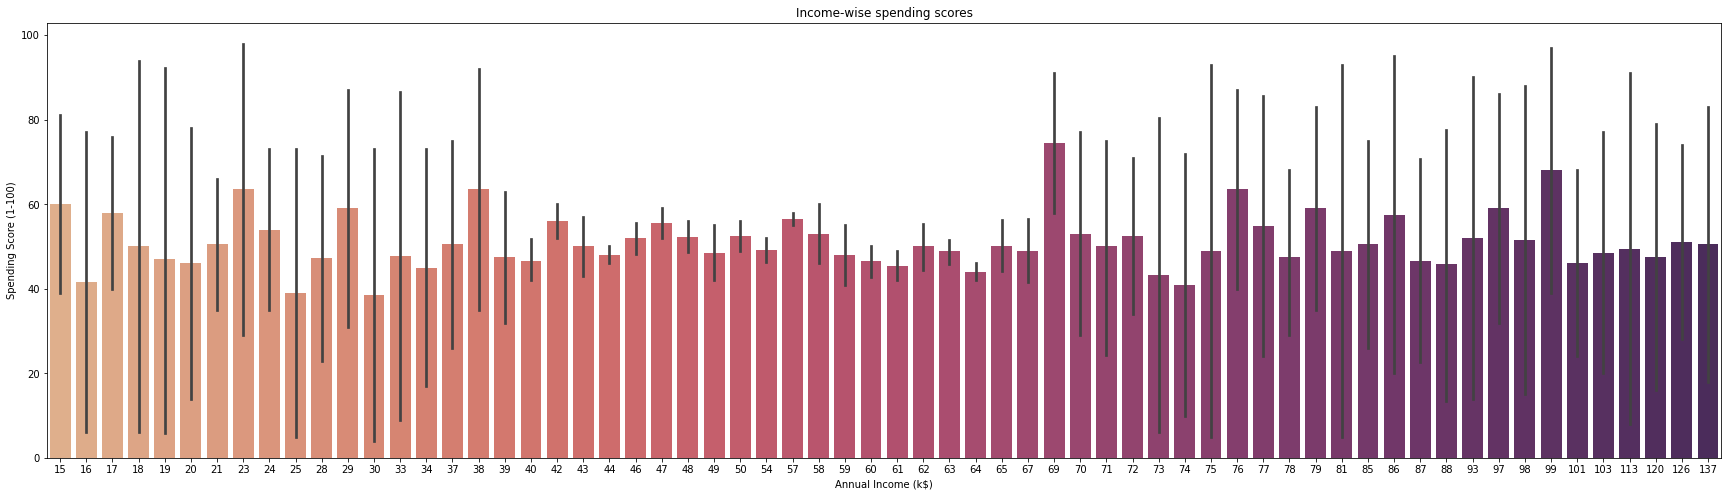

In [12]:
plt.figure(figsize=(30, 8))
plt.title('Income-wise spending scores')
sns.barplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], palette='flare')
plt.show()

People with annual income of 99k and 86k have the highest spending score and people from 30k - 60k annual income shows less spending scores ,while the people with less annual income or greatest anunual income show more spending scores.

Let's look at the spending scores according to ages. I am using [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) for this.

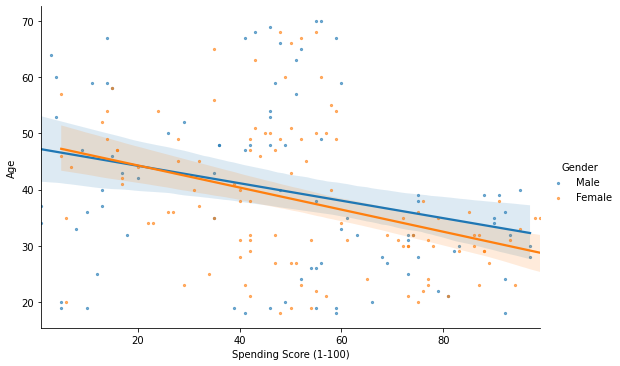

In [13]:
sns.lmplot(data=data,x='Spending Score (1-100)', y='Age', hue='Gender',aspect=1.5,scatter_kws={'s': 5, 'alpha': 0.6})

* There is a linear relation between Spending Score and Age. 
* Young customers tend to have more spending score and spending score decreases when age goes up. 
* The younger womens has again more spending score but as their ages increases the spending score decreases as compare to mens.

Let's compare their annual income according to gender for different ages . I am using [violoin](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plot for this , using violing plot we can combine the boxplot and KDE plot together.

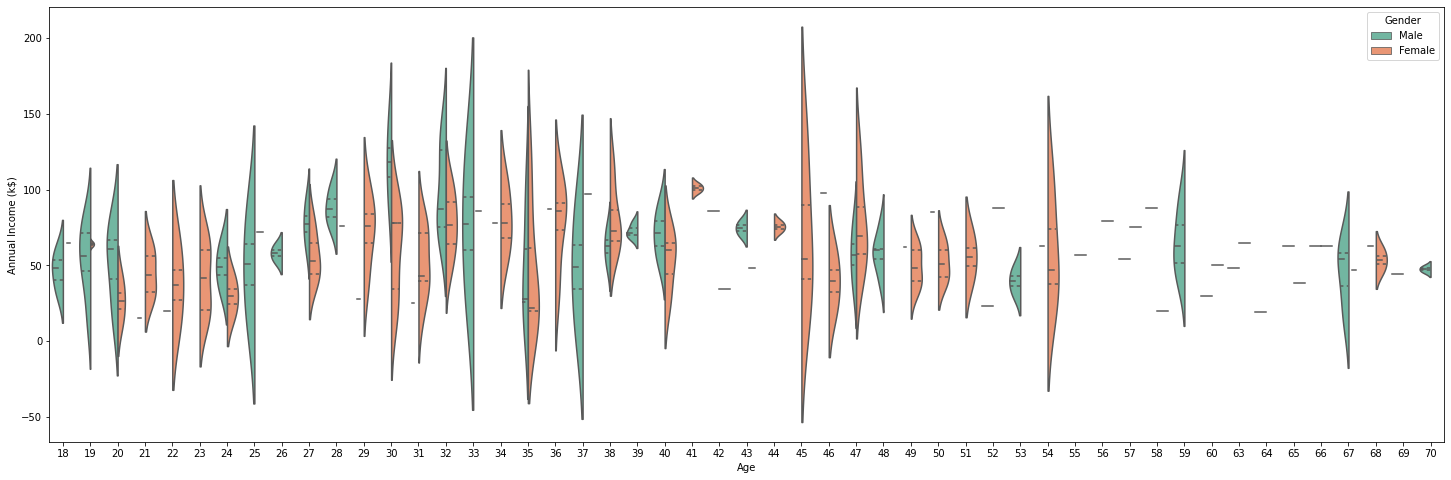

In [14]:
plt.figure(figsize=(25,8))
ax = sns.violinplot(x="Age", y="Annual Income (k$)", hue="Gender",data=data, palette="Set2", split=True,scale="count", inner="quartile")

* At the teenage , the mens were having more annual income but as the age increases the annual income of women increases , and again at the later ages above 55 the annual income of mens are more.
* If look at the overall middle quaritle then the avg of income of women is more than mens and income for most ages the avg of income women is more except the teenages, ages like: 33,37 & 25.



Let's look at the spending score and income according to ages , but the problem is that if we need to compare them then their scale should be same , means the score is in the range of 1-100 but the income is the range of 15-137k $ , to compare them we need to convert the income also in the range of 1-100.

I am using normalization over here for making them in the range of 0-1 and then multiply with 100 for scale of 0-100.<br>
Normalization(x) $=\frac{(X-min(X))}{(max(X)-min(X))}$

We would be left with floating value but the scores are integer so we would ceil those value for the decimal value >0.5 other wise floor.

In [15]:
import math  # math for ceil & floor 

In [16]:
mn=data['Annual Income (k$)'].min()-1
mx=data['Annual Income (k$)'].max()
data['Income score']=pd.Series([((x-mn)/(mx-mn))*100 for x in data['Annual Income (k$)']]) #finding the normalization (0-100)

In [17]:
data['Income score']=data['Income score'].apply(lambda x: math.ceil(x)  if (x%1)>0.5 else math.floor(x)) 

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income score
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


Taking the mean values according to ages inorder to compare score and incomes.

In [19]:
df=data.groupby('Age').mean()
df.drop(columns=['Annual Income (k$)','CustomerID'],inplace=True)

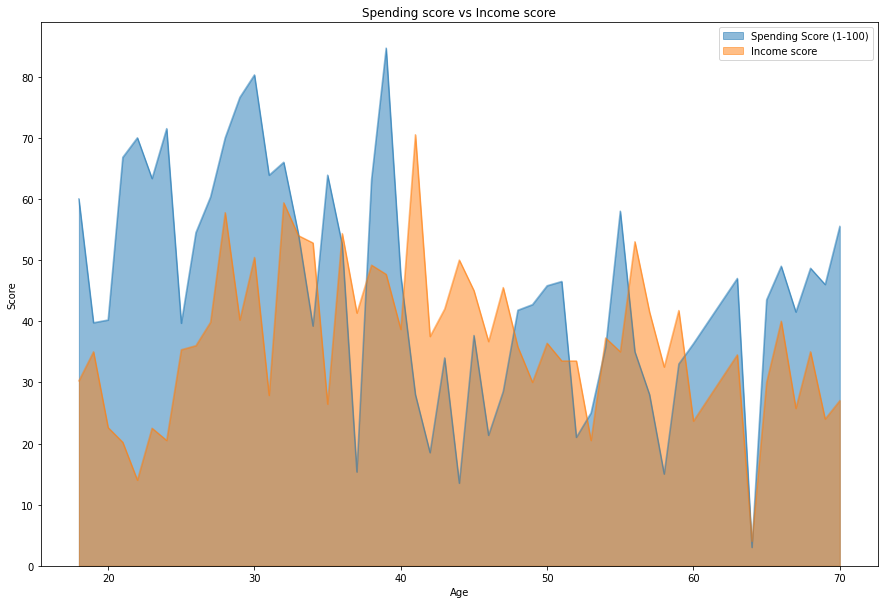

In [20]:

df.plot.area(use_index=True,stacked=False,figsize=(15, 10))

plt.ylabel('Score')

plt.title('Spending score vs Income score')
plt.show()

* Avg spending score of ages before 40 is more than their avg income , this shows less aged people are more willing to buy to fullfil their needs.
* Avg spending score decreases after age 40 , as they have decrease their spending and focus more on savings.
* As the age increases the income decrease and spending is also less as compare to ages like 40-50 but their expenses would be their due to medical conditions.

We have look at trends among the income ,ages and spending score . Now we would moved towards segmenting the cutomers, but before that lets check the correlation once.

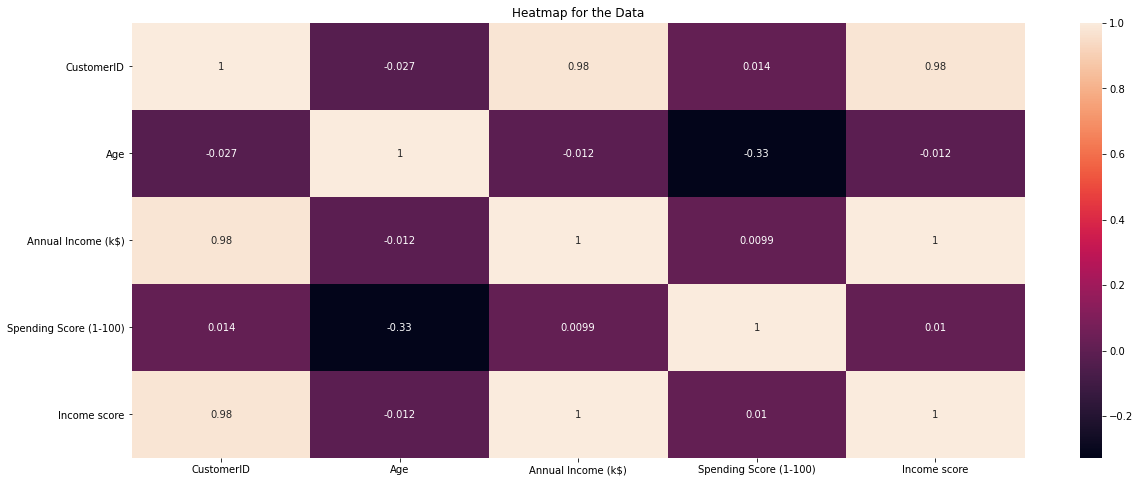

In [21]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Data')
plt.show()

As we can see the correlation is not good among the attributes ,the correlation of cutomerId only is some correlations.

We need to categories our customers ,as our goal was to understand the groups of people we have in order to plan marketing strategies.We can do this using clustering.

## Clustering for Segmentation

Clustering is unsupervised learning,Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.

We will be using Kmeans,heirarchical clustering and DBSCAN algo for clustering to segment the cutomers .

## K-Means

the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.The ‘means’ in the K-means refers to averaging of the data,that is finding the centroid.

<img src='Kmeans_animation.gif'/>

Steps:- <br>
1. Specify number of clusters K.<br>
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.<br>
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.<br>
4. Compute the sum of the squared distance between data points and all centroids.<br>
5. Assign each data point to the closest cluster (centroid).<br>
6. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

Cost function =$\sum_{i=1}^{i=m} \sum_{k=1}^{k} L_{i_k}||x^i-\mu k||$

$x^i$=data points <br>
$\mu k$=cluster mean<br>
$L_{i_k}$ represent cluster value 1 if $x^i$ belongs to cluster k ortherwise 0.

How do we find the value of k ?<br>
We can use Elbow method to get the optimal value of k.

#### Elbow method

We find the inertia for different values of clusters. Inertia is the sum of squared distances of samples to their closest cluster center and we plot a curve for inertia vs number of cluster, and  we chose k at the “elbow” point from the curve  i.e. the point after which the inertia start decreasing in a linear fashion.


In [22]:
data.drop(columns=['CustomerID','Income score'],inplace=True) #drop the id and income score 

In [23]:
data['Gender']=data['Gender'].apply(lambda x: 1 if x=='Male' else 0)  #mapping gender as male=1 and female=0

In [24]:
from sklearn.cluster import KMeans   #sklearn for kmeans

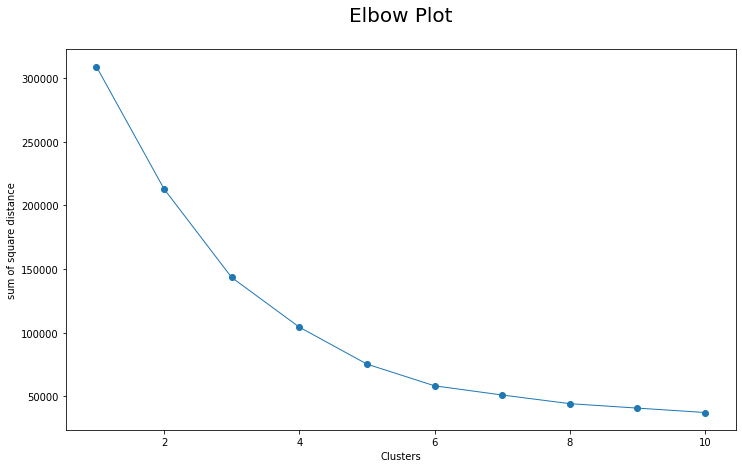

In [25]:
ssd = []            #store the sum of squared distance of sample from their cluster
k = range(1,11)     # taking k range from 1-11
for i in k:
  KModel = KMeans(n_clusters=i, init='k-means++',max_iter = 500, n_init = 15)
  KModel.fit(data)
  ssd.append(KModel.inertia_)      ## storing the inertia


#plot the inter for visualizing the elbow point 
plt.figure(figsize = (12, 7))
plt.plot(range(1, 11), ssd, linewidth = 1, marker = 'o')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('Clusters')
plt.ylabel('sum of square distance')
plt.show()

from above we can see the elbow point is at k=6 ,after which the curve almost become linear. This shows that we can define customer in 6 different categories.

In [26]:
#fit model for 6 clusters
KModel = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = KModel.fit_predict(data)


In [27]:
print("labels:",labels,"\n\n\n cluser centroids:\n",KModel.cluster_centers_)

labels: [5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 1 4 1 0 5 4 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3] 


 cluser centroids:
 [[ 0.34210526 27.         56.65789474 49.13157895]
 [ 0.44444444 56.15555556 53.37777778 49.08888889]
 [ 0.57142857 41.68571429 88.22857143 17.28571429]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]
 [ 0.38095238 44.14285714 25.14285714 19.52380952]]


In [28]:
colors = sns.color_palette(None,len(np.unique(labels))) # creating colors for cluster visualization

In [29]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

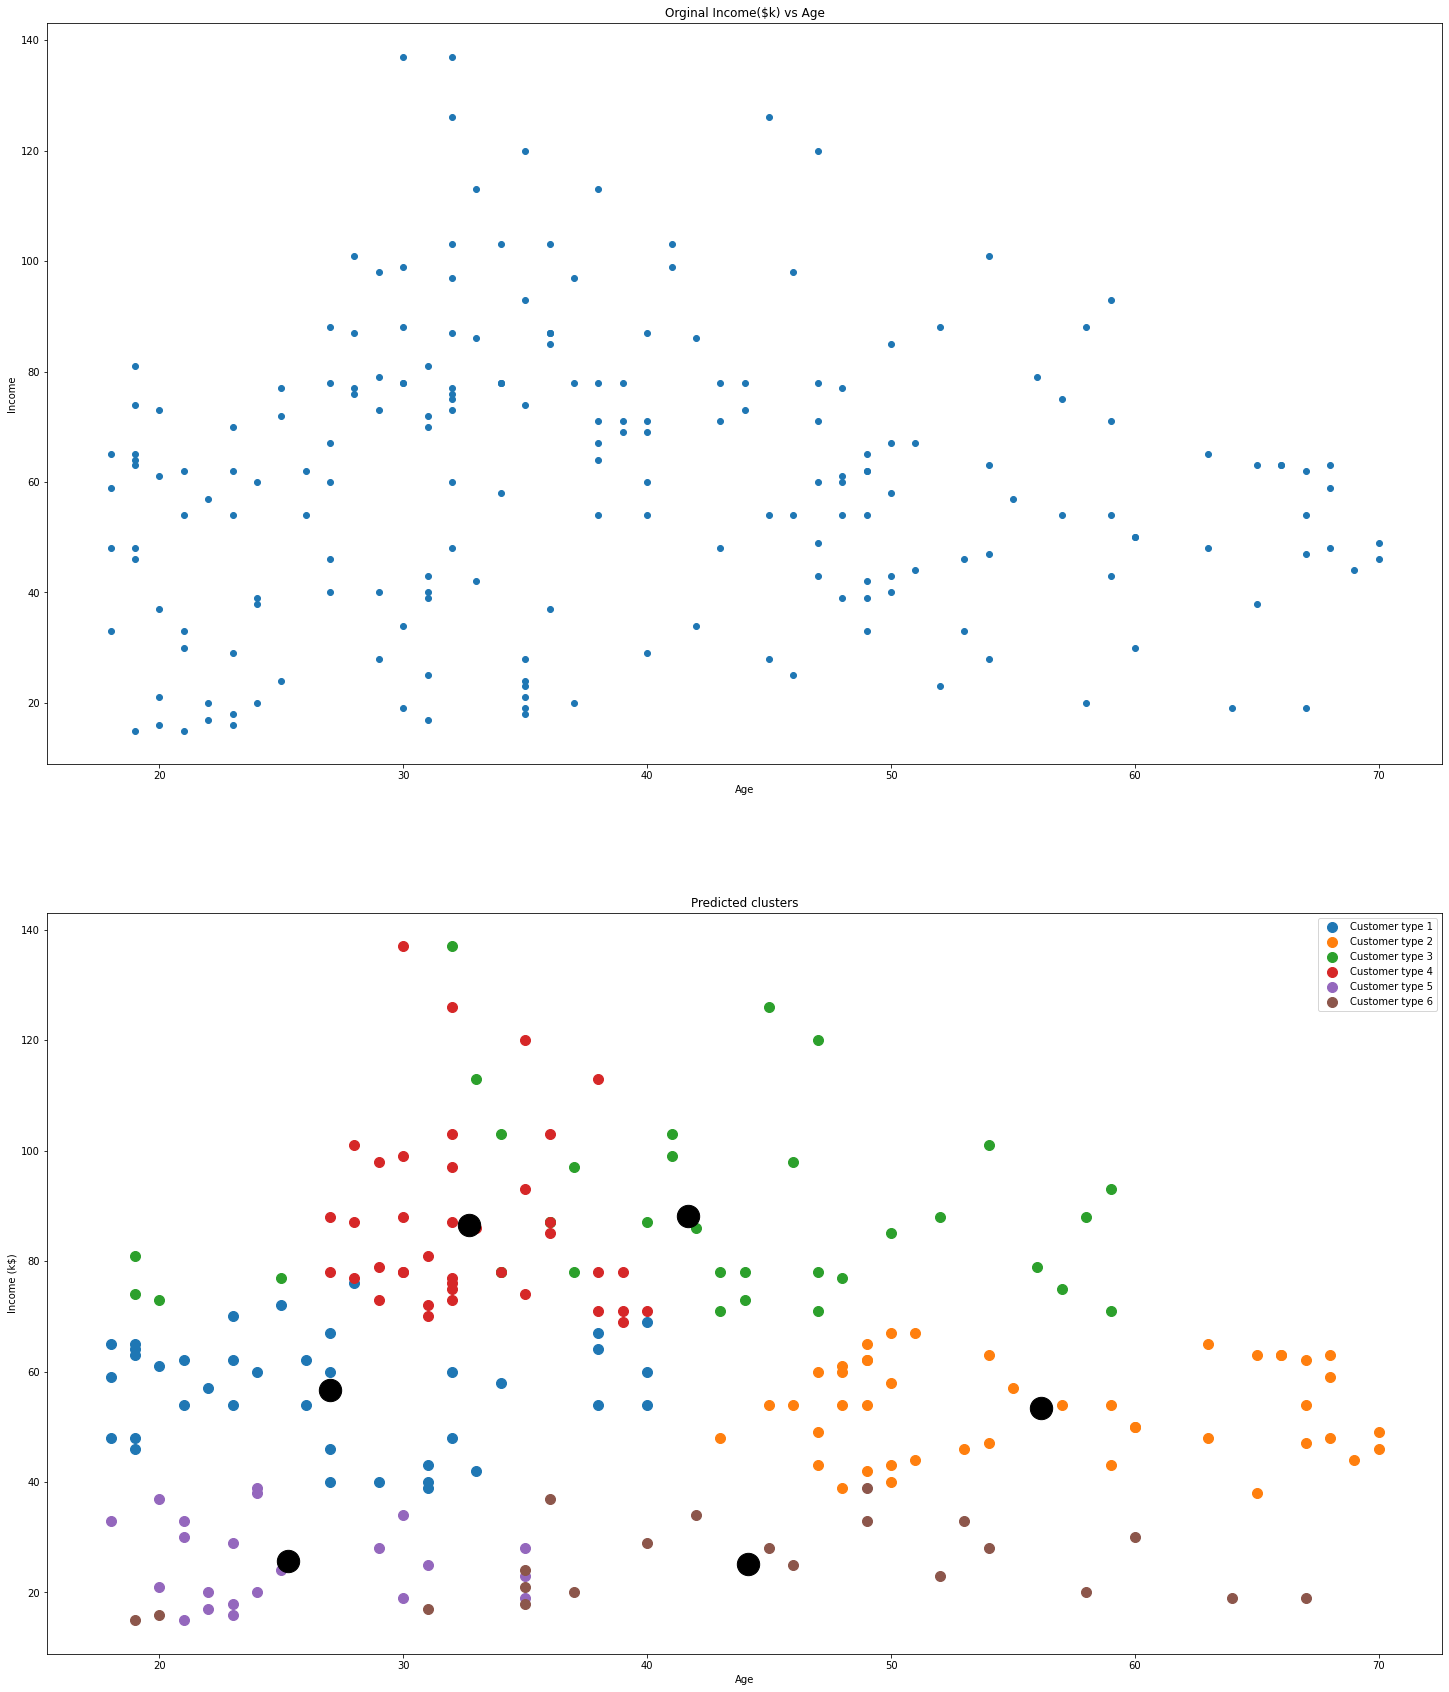

In [30]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(25,30))
#plotting original points for age vs income 
ax1.scatter(data=data,x='Age',y='Annual Income (k$)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_title('Orginal Income($k) vs Age')

#plotting the points according to their cluster value with different colrors 
for i in np.unique(labels):
    ax2.scatter(data[labels == i]['Age'] ,data[labels == i]['Annual Income (k$)'], s = 100, c = colors[i], label = 'Customer type '+str(i+1))
#ploting the kmeans centroids
ax2.scatter(KModel.cluster_centers_[:, 1], KModel.cluster_centers_[:, 2], s = 500, c = 'black')
   
ax2.set_title('Predicted clusters')
ax2.set_ylabel('Income (k$)')
ax2.set_xlabel('Age')
ax2.legend()
plt.show()

From above we can see the plot is much recognizable as the boundary is not their ,lets plot the boundary shaded region for each cluster. As we need to visualise in 2d so lets train boundary for 2 axis ,x=Ages and y=Income . We can use [PCA-reduced](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py) method to plot the shaded cluster


In [31]:
X=data.iloc[:,1:3]  # selecting 2 columns 

In [32]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300))
algorithm.fit(X)
labels1 = algorithm.labels_    #storing label
centroids1 = algorithm.cluster_centers_     #storing center

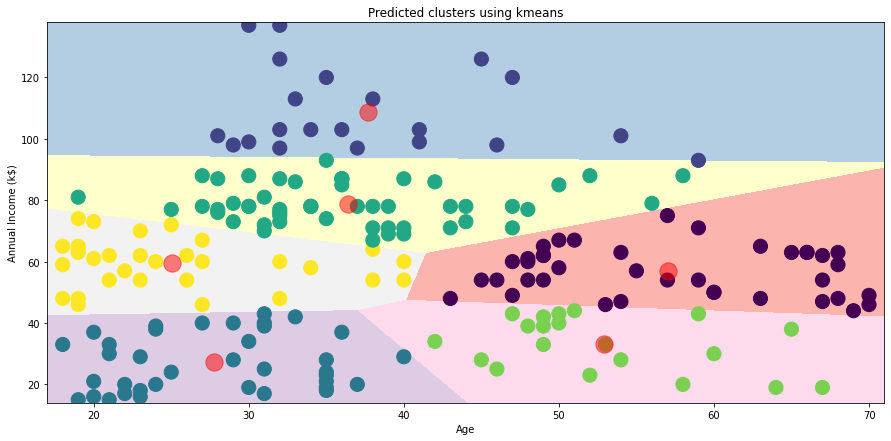

In [33]:
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
#put the boundary points 
plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel1, aspect = 'auto', origin='lower')
#plot the datapoints 
plt.scatter( x = 'Age' ,y = 'Annual Income (k$)' , data = data , c = labels1 , 
            s = 200 )
#plot the centroids
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.title('Predicted clusters using kmeans')
plt.show()

Drawback of K-means:
* Difficult to predict K-Value.
* With global cluster, it didn't work well.
* Different initial partitions can result in different final clusters.

To address these problem we use Heirarical clustering.

## Heirarical Clustering

In this type of clustering we do not define initial random clusters,instead we find the pair of cluster according to the points distances and group them, we this till all the points are grouped, thus its an bottom up approach.It’s also known as AGNES (Agglomerative Nesting).

<img src='hc.gif'/>

Steps:-<br>
1. Make each data point a single-point cluster → forms N clusters<br>
2. Take the two closest data points and make them one cluster → forms N-1 clusters<br>
3. Take the two closest clusters and make them one cluster → Forms N-2 clusters. <br>
4. Repeat step-3 until you are left with only one cluster.

We can visual Heirarical clustering using dendrograms

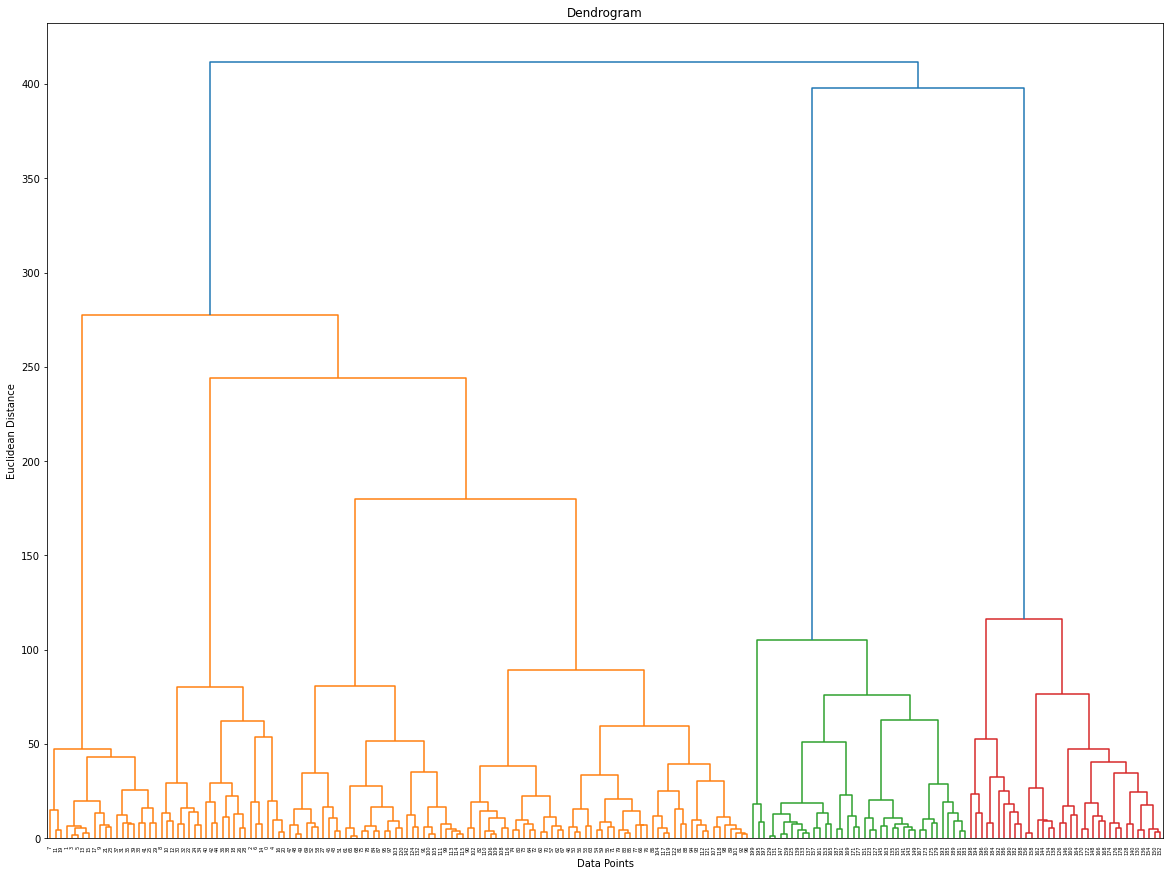

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data, method="ward") # ward : mathematical expression
plt.figure(figsize=(20,15))
dendrogram(merg, leaf_rotation=90)  #plot the dendograms

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram")
plt.show()

Q. Now the question is that were should be stop merging the clusters?<br>
A. We can cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

From above plot we can cut the longes line around y=150, and we observe then the we can have 6 clusters .

In [35]:
from sklearn.cluster import AgglomerativeClustering #sklearn for AGNES

AC = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
y_hc= AC.fit_predict(X)
data['label']=y_hc  # store the cluser number in dataframe

In [36]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,5
196,0,45,126,28,5
197,1,32,126,74,5
198,1,32,137,18,5


Let's visualize the sample points in 3d with different cluster values. I am using plotly for 3d plot.

In [37]:
#plot  3d scatter with consing 'Age','Income' and 'Spending score' as axis
points = go.Scatter3d(x= data['Age'],y= data['Spending Score (1-100)'],z= data['Annual Income (k$)'],mode='markers',marker=dict(color = data['label'], size= 10,
line=dict(color= data['label'],width= 12),opacity=0.8))
df = [points]

layout = go.Layout(title = 'Character vs Gender vs Alive or not',margin=dict(l=0,r=0,b=0,t=0),scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Spending Score'),zaxis = dict(title  = 'Annual Income')))
fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

Limtation of Heirarchical clustering:<br>
* Sensitivity to noise and outliers
* Breaking large clusters
* Difficulty handling different sized clusters and convex shapes
* Sometimes it is difficult to identify the correct number of clusters by the dendogram.<br>
For more details refer [here](https://www.kindsonthegenius.com/machine-learning-questions-and-answers-questions-11-to-20/)

Different cluster shapes and Sensitivity to outliers can be handle by DBSCAN.

### Density-based spatial clustering of applications with noise(DBSCAN)

DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

**Terms**:
* minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
* eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.
* Core — This is a point that has at least m points within distance n from itself.
* Border — This is a point that has at least one Core point at a distance n.
* Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

<img src='DBSCAN.gif'/>

Connectivity sould be their among the sample points in order to form cluster continuously, it involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

Steps:-<br>
1. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).<br>
2. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.<br>
3. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point
4. If anypoints fails to satisfy above critera then it would be categorise as Outliers.


In [38]:
data.drop(columns=['label'],inplace=True)  #drop the column from previous value 

In [39]:
from sklearn.cluster import DBSCAN # import dbscan lib

In [40]:
# feature scaling the datapoints as dbscan is sentsitive to outlier and large distance amoing data points would be calculated
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

In [41]:
model = DBSCAN(eps=1,min_samples=5)         
cluster_labels = model.fit_predict(X)

In [42]:
cluster_labels

array([-1,  0, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1])

from above : -1 represents the outliers and other respresents the clustes

Now let's visualize these cluster in 3d as we would be having 3 features : 'Age','Income' and 'Spending Score'

In [43]:
#plot the 3d scatter points 
fig = px.scatter_3d(x=data.iloc[:,1], y=data.iloc[:,2], z=data.iloc[:,3],
                    color=cluster_labels,opacity=0.8,
                    color_continuous_scale=['red','blue','green'],
                    width=800,height=800)

fig.update_layout(font_family='monospace',scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Spending Score'),zaxis = dict(title  = 'Annual Income')),
    title=dict(text='Customer Clusters in 3D',x=0.5,y=0.95,
    font=dict(color='#636363',size=20)),
    coloraxis_showscale=False)
fig.show()

## Conclusion

* Avg of the customer where from age group of 38 and all kind of cutomers where their having income range from 15-137($k).
* Most of the customer were women , so we need to look after the products that womens mostly focuses on.
* Most of the cutomer where having average income between \$50k -  \$80k , these are some of the special customers for marketer because they might give more profit.
* People with annual less than 25k and greater the 70k $ shows more spending scores , marketers need to make another strategies for  them as they most regular persons.
* People having age lesser than 30 have the avg spending score higher than income score while it got decrease the age increases ,this shows that they are saving or not spending much as compared to their income.
* We can use clustering algo to sengment the data.
* Using Kmeans ans Hierarchical clustering we can divide the customers into 6 categories.
* DBSCAN can handle the outlier points and can include points with are resembling some similarities , we achieve 2 cluster using DBSCAN. Outliers can be helpful for marketer to plan for targeting customers.